Price = -0.14 * Rooms + 2.22


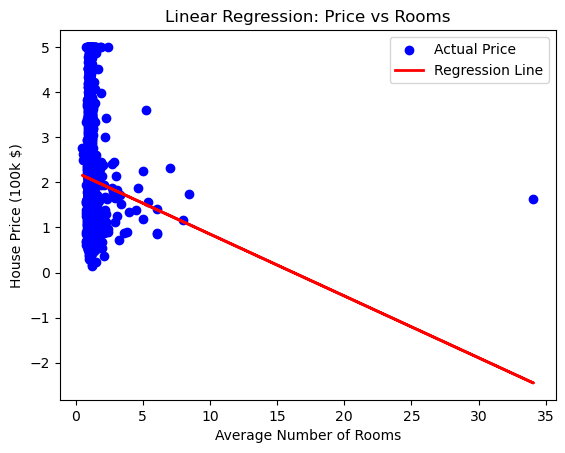

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = fetch_california_housing()
rooms = data.data[:, [3]]
price = data.target

rooms_train, rooms_test, price_train, price_test = train_test_split(rooms, price, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(rooms_train, price_train)

slope = model.coef_[0]
intercept = model.intercept_
print(f"Price = {slope:.2f} * Rooms + {intercept:.2f}")

price_pred = model.predict(rooms_test)

plt.scatter(rooms_test, price_test, color='blue', label='Actual Price')
plt.plot(rooms_test, price_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Average Number of Rooms')
plt.ylabel('House Price (100k $)')
plt.title('Linear Regression: Price vs Rooms')
plt.legend()
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

data = fetch_california_housing()
features = data.data[:, [0, 1, 2, 3]]
target = data.target

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(features_train, target_train)

target_pred = model.predict(features_test)

r2 = r2_score(target_test, target_pred)
mse = mean_squared_error(target_test, target_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")

coef = model.coef_
for i in range(len(coef)):
    print(f"Feature {i+1} Coefficient: {coef[i]:.4f}")


R-squared: 0.509
MSE: 0.644
RMSE: 0.802
Feature 1 Coefficient: 0.5453
Feature 2 Coefficient: 0.0161
Feature 3 Coefficient: -0.2246
Feature 4 Coefficient: 1.1130


In [4]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

data = fetch_california_housing()
x = data.data[:, [0, 1, 2, 3]]
y = data.target

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

modela = LinearRegression()
modela.fit(xtrain, ytrain)
ypreda = modela.predict(xtest)
r2a = r2_score(ytest, ypreda)
msea = mean_squared_error(ytest, ypreda)
rmsea = np.sqrt(msea)

scaler = StandardScaler()
xtrainscaled = scaler.fit_transform(xtrain)
xtestscaled = scaler.transform(xtest)

modelb = LinearRegression()
modelb.fit(xtrainscaled, ytrain)
ypredb = modelb.predict(xtestscaled)
r2b = r2_score(ytest, ypredb)
mseb = mean_squared_error(ytest, ypredb)
rmseb = np.sqrt(mseb)

print(f"Before Scaling - R2: {r2a:.3f}, MSE: {msea:.3f}, RMSE: {rmsea:.3f}")
print(f"After Scaling  - R2: {r2b:.3f}, MSE: {mseb:.3f}, RMSE: {rmseb:.3f}")


Before Scaling - R2: 0.509, MSE: 0.644, RMSE: 0.802
After Scaling  - R2: 0.509, MSE: 0.644, RMSE: 0.802


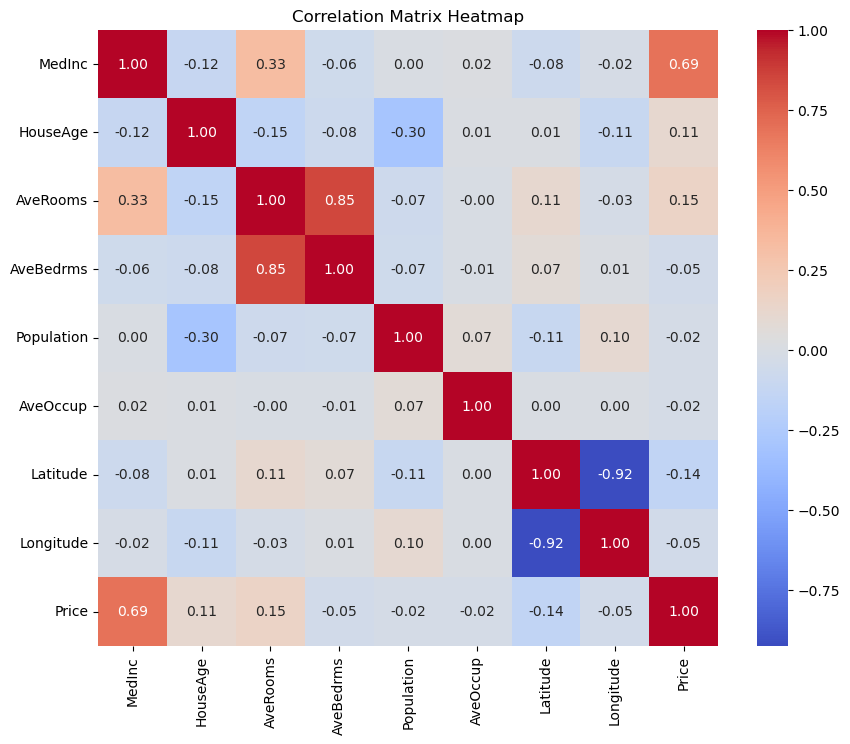

Feature correlations with target (Price):
MedInc        0.688075
AveRooms      0.151948
Latitude      0.144160
HouseAge      0.105623
AveBedrms     0.046701
Longitude     0.045967
Population    0.024650
AveOccup      0.023737
Name: Price, dtype: float64


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
x = data.data
y = data.target
names = data.feature_names

df = pd.DataFrame(x, columns=names)
df["Price"] = y

matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

correlations = matrix["Price"].drop("Price")
sorted_corr = correlations.abs().sort_values(ascending=False)
print("Feature correlations with target (Price):")
print(sorted_corr)


Accuracy: 0.956
Precision: 0.946
Recall: 0.986
F1-score: 0.966
ROC-AUC: 0.998


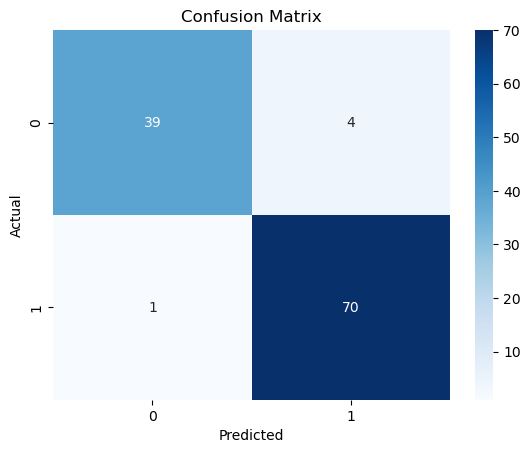

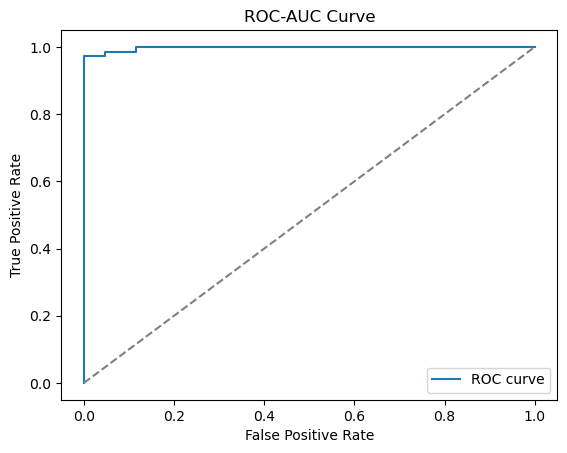

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

data = load_breast_cancer()
x = data.data
y = data.target

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(xtrain, ytrain)

ypred = model.predict(xtest)
yprob = model.predict_proba(xtest)[:, 1]

acc = accuracy_score(ytest, ypred)
prec = precision_score(ytest, ypred)
rec = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)
auc = roc_auc_score(ytest, yprob)

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"ROC-AUC: {auc:.3f}")

matrix = confusion_matrix(ytest, ypred)
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(ytest, yprob)
plt.plot(fpr, tpr, label="ROC curve")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()


Threshold: 0.3
Confusion Matrix:
[[39  4]
 [ 1 70]]
F1-score: 0.966

Threshold: 0.5
Confusion Matrix:
[[39  4]
 [ 1 70]]
F1-score: 0.966

Threshold: 0.7
Confusion Matrix:
[[41  2]
 [ 1 70]]
F1-score: 0.979



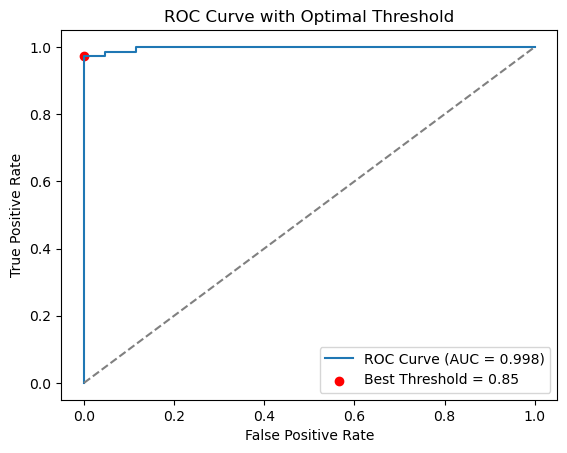

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, roc_auc_score

data = load_breast_cancer()
x = data.data
y = data.target

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(xtrain, ytrain)

yprob = model.predict_proba(xtest)[:, 1]

thresholds = [0.3, 0.5, 0.7]

for t in thresholds:
    ypred = (yprob >= t).astype(int)
    matrix = confusion_matrix(ytest, ypred)
    f1 = f1_score(ytest, ypred)
    print(f"Threshold: {t}")
    print(f"Confusion Matrix:\n{matrix}")
    print(f"F1-score: {f1:.3f}\n")

fpr, tpr, thr = roc_curve(ytest, yprob)
auc = roc_auc_score(ytest, yprob)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

youden = tpr - fpr
best = np.argmax(youden)
best_threshold = thr[best]
plt.scatter(fpr[best], tpr[best], color="red", label=f"Best Threshold = {best_threshold:.2f}")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Optimal Threshold")
plt.legend()
plt.show()


In [8]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

data = load_iris()
x = data.data
y = data.target

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
model.fit(xtrain, ytrain)

ypred = model.predict(xtest)

acc = accuracy_score(ytest, ypred)
report = classification_report(ytest, ypred)

print(f"Accuracy: {acc:.3f}")
print("Classification Report:")
print(report)


Accuracy: 1.000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [9]:
'''Assumptions of linear regression:
Linear regression assumes a linear relationship between features and the target, normally distributed errors, constant variance of errors (homoscedasticity), no multicollinearity among features, and independence of observations.

When to use logistic regression:
Logistic regression should be used when the target variable is categorical, especially binary, whereas linear regression is for continuous numeric targets.

Interpretation of coefficients in logistic regression:
Coefficients in logistic regression represent the change in the log-odds of the outcome for a one-unit increase in the predictor, holding other variables constant.

Difference between sigmoid and softmax:
Sigmoid maps input to a probability between 0 and 1 for binary classification, while softmax generalizes this to multiclass classification by converting scores into probabilities that sum to 1 across all classes.

Why R-squared is not suitable for logistic regression:
R-squared measures variance explained in continuous outcomes and does not apply to classification problems. Logistic regression uses metrics like accuracy, precision, recall, and ROC-AUC instead.'''

'Assumptions of linear regression:\nLinear regression assumes a linear relationship between features and the target, normally distributed errors, constant variance of errors (homoscedasticity), no multicollinearity among features, and independence of observations.\n\nWhen to use logistic regression:\nLogistic regression should be used when the target variable is categorical, especially binary (e.g., yes/no, 0/1), whereas linear regression is for continuous numeric targets.\n\nInterpretation of coefficients in logistic regression:\nCoefficients in logistic regression represent the change in the log-odds of the outcome for a one-unit increase in the predictor, holding other variables constant.\n\nDifference between sigmoid and softmax:\nSigmoid maps input to a probability between 0 and 1 for binary classification, while softmax generalizes this to multiclass classification by converting scores into probabilities that sum to 1 across all classes.\n\nWhy R-squared is not suitable for logis